In [1]:
import numpy as np
import random

c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\berkan\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [47]:
class Sensors():
    
    def __init__(self, operation_area, max_speed):
        self.operation_area = [
            [int(operation_area.split(',')[0]), int(operation_area.split(',')[1])],
            [int(operation_area.split(',')[2]), int(operation_area.split(',')[3])]
        ]
        
        self.max_speed = max_speed
         # Sensors
        self.all_sensors = list()
        self.speedometer = list()
        self.location = list()
        self.temperature = list()
        self.pressure = list()
        
        self.last_speedometer = {'x': 0, 'y': 0}
        self.last_location = {'x': 0, 'y': 0}
        
    def _move(self):
        x_movement = random.randint(0, self.max_speed) * (1 if random.random() < 0.5 else -1)
        y_movement = random.randint(0, self.max_speed) * (1 if random.random() < 0.5 else -1)

        if self.last_location['x'] + x_movement < self.operation_area[0][0]:
            x_movement = self.operation_area[0][0] - self.last_location['x']
        if self.last_location['x'] + x_movement > self.operation_area[1][0]:
            x_movement = self.operation_area[1][0] - self.last_location['x']
        if self.last_location['y'] + y_movement < self.operation_area[0][1]:
            y_movement = self.operation_area[0][1] - self.last_location['y']
        if self.last_location['y'] + y_movement > self.operation_area[1][1]:
            y_movement = self.operation_area[1][1] - self.last_location['y']

        self.last_location = {'x': self.last_location['x'] + x_movement,
                              'y': self.last_location['y'] + y_movement}
        self.last_speedometer = {'x': x_movement, 'y': y_movement}
        
        self.location.append(self.last_location)
        self.speedometer.append(self.last_speedometer)
        
        
    def _get_temperature(self):
        
        # Min : -77 Celcius, Max : -13 Celcius, Mean : -55 Celcius
        air_temperature_celcius = np.random.normal(-55, 12, 1)[0]
        
        #pressure_pascals = np.random.normal(725, 48, 1)
        #rems_sensors = np.concatenate((air_temperature_celcius, pressure_pascals))
        self.temperature.append(air_temperature_celcius)
        return air_temperature_celcius
    
    def _get_pressure(self):
        
        pressure_pascals = np.random.normal(725, 48, 1)[0]
        #rems_sensors = np.concatenate((air_temperature_celcius, pressure_pascals))
        self.pressure.append(pressure_pascals)
        return pressure_pascals
    
    def update(self):
        
        self._move()
        last_temperature = self._get_temperature()
        last_pressure = self._get_pressure()
        
        self.all_sensors.append([self.last_location['x'], self.last_location['y'],
                                 last_temperature, last_pressure])
        

In [81]:
sensor1 = Sensors(operation_area = "0,1000,0,1000", max_speed = 10)
sensor2 = Sensors(operation_area = "0,2000,1000,3000", max_speed = 5)
sensor3 = Sensors(operation_area = "1000,2000,0,500", max_speed = 10)
sensor4 = Sensors(operation_area = "2000,3000,1000,3000", max_speed = 5)
for i in range(100):
    sensor1.update()
    sensor2.update()
    sensor3.update()
    sensor4.update()

#print(np.array(sensor1.all_sensors)[:,2])

In [82]:
def get_labels_for_temperature(sensor):
    labels = list()
    for x in np.array(sensor1.all_sensors)[:,2]:
        if (x < -65):
            labels.append(-1)
        elif(x > -45):
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

In [83]:
labels_temp_1 = get_labels_for_temperature(sensor1)
labels_temp_2 = get_labels_for_temperature(sensor2)
labels_temp_3 = get_labels_for_temperature(sensor3)
labels_temp_4 = get_labels_for_temperature(sensor4)

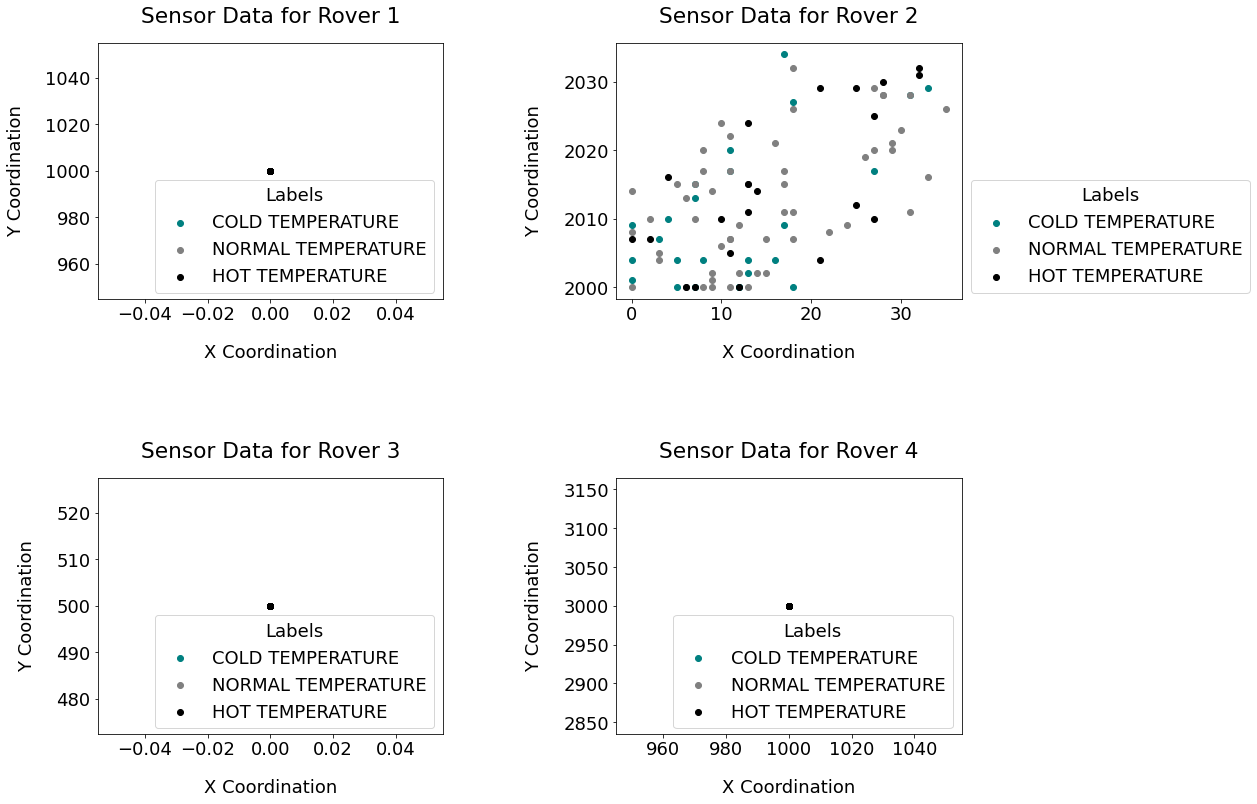

In [84]:
# Sensor Data Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', size=18)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))

sensor_lib = [sensor1, sensor2, sensor3, sensor4]
ax_lib = [ax1,ax2,ax3,ax4]
labels_lib = [labels_temp_1, labels_temp_2, labels_temp_3, labels_temp_4]
for i,ax in enumerate (ax_lib):
    
    
    indeces_1 = np.where(labels_lib[i] == 1)[0]
    indeces_minus_1 = np.where(labels_lib[i] == -1)[0]
    indeces_zero = np.where(labels_lib[i] == 0)[0]
    
    ax.scatter(np.array(sensor_lib[i].all_sensors)[indeces_1, 0],
               np.array(sensor_lib[i].all_sensors)[indeces_1, 1], 
               c = "teal", marker="o" , label ="COLD TEMPERATURE")
    
    ax.scatter(np.array(sensor_lib[i].all_sensors)[indeces_zero, 0],
               np.array(sensor_lib[i].all_sensors)[indeces_zero, 1], 
               c = "gray", marker="o" , label ="NORMAL TEMPERATURE")
    
    ax.scatter(np.array(sensor_lib[i].all_sensors)[indeces_minus_1, 0],
               np.array(sensor_lib[i].all_sensors)[indeces_minus_1, 1],
               c = 'black' , marker="o", label = "HOT TEMPERATURE")
    
    #ax.scatter(sensor_lib[i].all_sensors[0], sensor_lib[i].all_sensors[1], labels_temp_1)
    ax.set_title('Sensor Data for Rover {a}' .format(a= i+1), pad=20)
    ax.set(xlabel = "X Coordination" , ylabel = 'Y Coordination')
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 20
    ax.legend( bbox_to_anchor=(1, 0.5), title = "Labels")

plt.subplots_adjust(wspace=0.5, hspace=0.7, left=0, right=1, bottom=0, top=1.2)
plt.show()